<a href="https://colab.research.google.com/github/shaharinv/Quantum-computing-coding-school/blob/main/Copy_of_Measuring_in_the_X_basis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Measuring in the $\{|+\rangle, |-\rangle\}$ basis

In [ ]:
# This cell can be skipped if you already have the following packages installed

!pip install qiskit
!pip install qiskit-aer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 66.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 102.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 13.7 MB/s eta 0:00:00


In [ ]:
import random

from qiskit import Aer, execute, QuantumCircuit
from qiskit.visualization import plot_histogram

In this notebook we will look at how to measure the outcome of a 1 qubit circuit in the $\{|+\rangle, |-\rangle\}$ basis. We first create a circuit that randomly produces either a $|+\rangle$ state or a $|-\rangle$ state. This is known as the $X$ basis.

In [ ]:
def create_state() -> QuantumCircuit:
    """Creates a quantum circuit that outputs either |+> or |->"""
    qc = QuantumCircuit(1)
    negative = random.choice([True, False])
    if negative:
        qc.x(0)
    qc.h(0)
    return qc

We want to now be able to tell if it was in the $|+\rangle$ state or a $|-\rangle$ state. If we naively measure it, we will not be able to since both $|+\rangle$ and $|-\rangle$ collapse to $|0\rangle$ or $|1\rangle$ with a 50% probability:

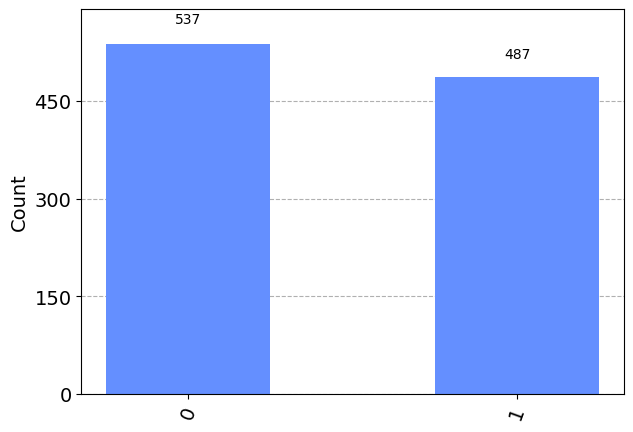

In [ ]:
qc=create_state()
qc.measure_all()
qasm_sim = Aer.get_backend("qasm_simulator")
job=execute(qc, backend=qasm_sim)
counts = job.result().get_counts()
plot_histogram(counts)

Your goal is to add the appropriate gates to the circuit such that it produces a measurement outcome 0 if the circuit produces a $|+\rangle$ and a measurement outcome of 1 if the circuit produces a $|-\rangle$ state with a single measurement.

In [ ]:
def measure_in_x(qc: QuantumCircuit) -> QuantumCircuit:
    """Suggested helper function for plus_or_minus. Adds to the circuit such that a measurement in the X basis takes place"""
    qc = qc.copy()

    #######
    qc.h(0)
    qc.measure_all()
    #######

    return qc

def plus_or_minus(qc: QuantumCircuit) -> int:
    """Takes in a quantum circuit that is guaranteed to produce either |+> or |-> and returns 0 if it is |+> and 1 if it is |->"""
    qc = measure_in_x(qc) #Suggested helper function
    qasm_sim = Aer.get_backend("qasm_simulator")
    job = execute(qc, backend=qasm_sim, shots=1)
    counts=job.result().get_counts()
    return int(list(counts.keys())[0])
    #######
    #FILL IN CODE HERE
    #######

Now we will check that indeed you can measure with a single shot whether the circuit produced a $|+\rangle$ state or a $|-\rangle$ state

In [ ]:
for _ in range(100):
    sv_sim = Aer.get_backend('statevector_simulator')
    trial_circuit = create_state()
    job=execute(trial_circuit, backend=sv_sim)
    statevector = job.result().get_statevector(trial_circuit)
    if statevector[1] > 0:
        state = 0
    else:
        state = 1
    assert(int(plus_or_minus(trial_circuit)) == state), f'the circuit returned {plus_or_minus(trial_circuit)} when it should have return {state}'
print('Well done, you have successfully managed to measure the state in the X basis 100 out of 100 times')

Well done, you have successfully managed to measure the state in the X basis 100 out of 100 times
